In [1]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import svm
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


# Question 1

In [2]:
# Load dataset
data = load_iris(as_frame=True)
x = data.data
y = data.target
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target_names = data.target_names
# Split training and testing data
x_train, x_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.1, random_state=0)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)


In [4]:
# Plot confusion matrix
def plot_confusion_matrix(title, y_test, y_pred):

    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt='.4g')
    plt.ylabel('True', fontsize=15)
    plt.xlabel('Predicted', fontsize=15)
    plt.title(title, fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred, target_names=target_names))

# Implementing SVM


def svm_func(x_train, x_test, y_train, y_test):
    k = ['linear', 'poly', 'rbf', 'sigmoid']

    for i in range(len(k)):
        clf = svm.SVC(kernel=k[i])
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        plot_confusion_matrix(k[i]+' kernel', y_test, y_pred)
    x_train_precomp = np.dot(x_train, x_train.T)
    x_test_precomp = np.dot(x_test, x_train.T)
    clf = svm.SVC(kernel='precomputed')
    clf.fit(x_train_precomp, y_train)
    y_pred = clf.predict(x_test_precomp)
    plot_confusion_matrix('precomputed kernel', y_test, y_pred)


### a) Use sklearn SVM classifier and perform classification on dataset.

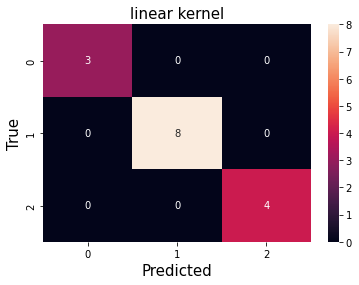

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



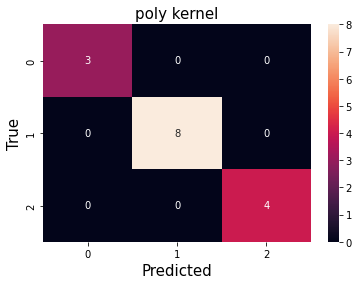

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



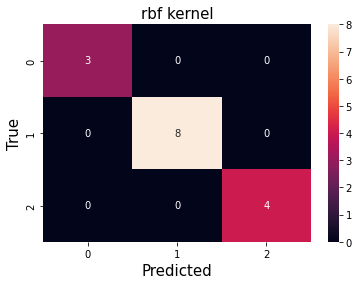

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



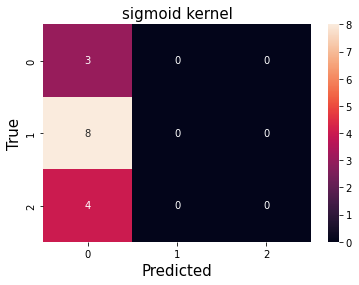

              precision    recall  f1-score   support

      setosa       0.20      1.00      0.33         3
  versicolor       0.00      0.00      0.00         8
   virginica       0.00      0.00      0.00         4

    accuracy                           0.20        15
   macro avg       0.07      0.33      0.11        15
weighted avg       0.04      0.20      0.07        15



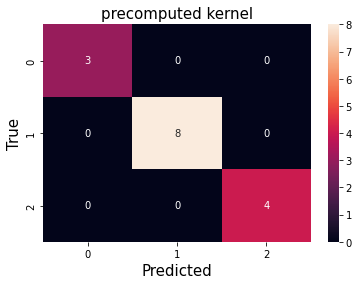

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [5]:
svm_func(x_train, x_test, y_train, y_test)


### b) Normalize the data and then perform same experiment on normalized data

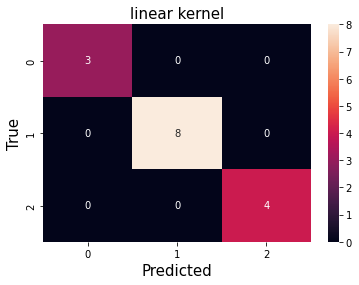

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



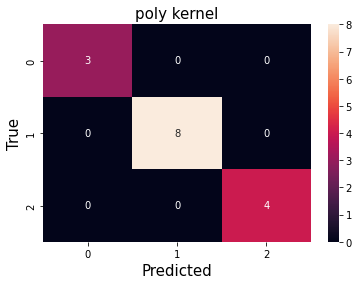

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



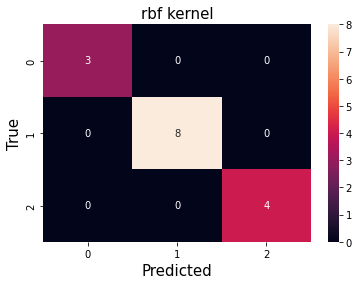

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



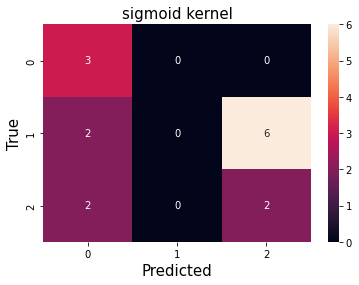

              precision    recall  f1-score   support

      setosa       0.43      1.00      0.60         3
  versicolor       0.00      0.00      0.00         8
   virginica       0.25      0.50      0.33         4

    accuracy                           0.33        15
   macro avg       0.23      0.50      0.31        15
weighted avg       0.15      0.33      0.21        15



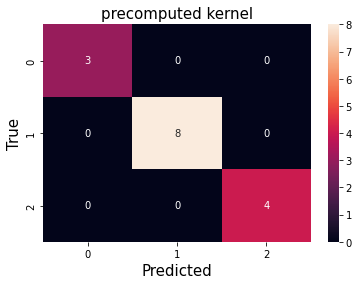

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [6]:
sc = MinMaxScaler()
x_norm_train = sc.fit_transform(x_train)
x_norm_test = sc.fit_transform(x_test)
svm_func(x_norm_train, x_norm_test, y_train, y_test)


### Feature reduction

<AxesSubplot:>

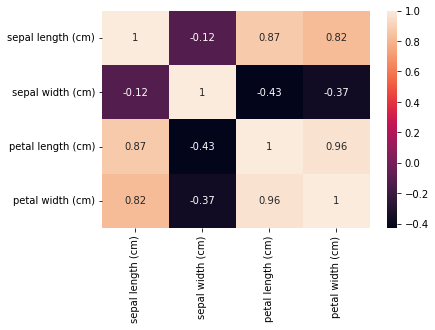

In [7]:
sns.heatmap(x.corr(), annot=True)


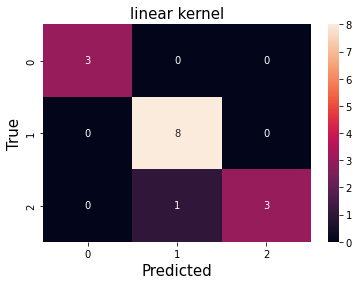

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



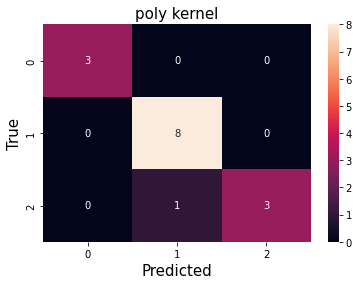

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



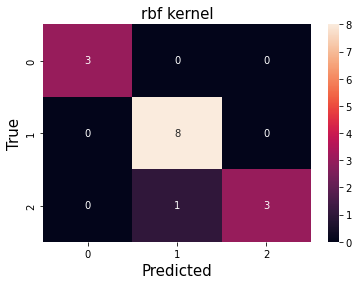

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



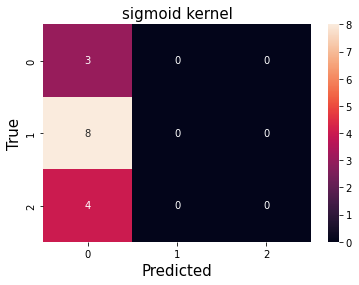

              precision    recall  f1-score   support

      setosa       0.20      1.00      0.33         3
  versicolor       0.00      0.00      0.00         8
   virginica       0.00      0.00      0.00         4

    accuracy                           0.20        15
   macro avg       0.07      0.33      0.11        15
weighted avg       0.04      0.20      0.07        15



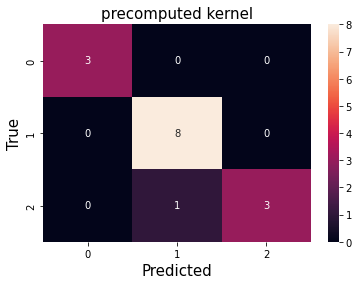

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



In [8]:
# Eliminate the feature having highest correlation with other features i.e., petal length
x = x.drop(columns=['petal length (cm)'])

# Split training and testing data
x_train, x_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.1, random_state=0)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
# Perform classification
svm_func(x_train, x_test, y_train, y_test)


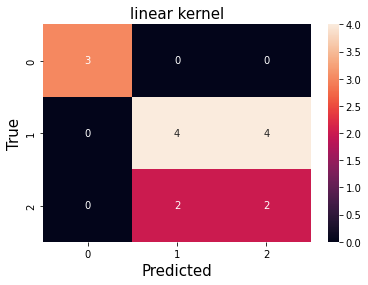

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.67      0.50      0.57         8
   virginica       0.33      0.50      0.40         4

    accuracy                           0.60        15
   macro avg       0.67      0.67      0.66        15
weighted avg       0.64      0.60      0.61        15



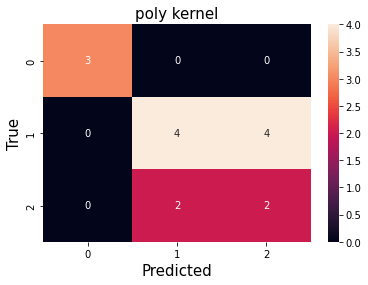

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.67      0.50      0.57         8
   virginica       0.33      0.50      0.40         4

    accuracy                           0.60        15
   macro avg       0.67      0.67      0.66        15
weighted avg       0.64      0.60      0.61        15



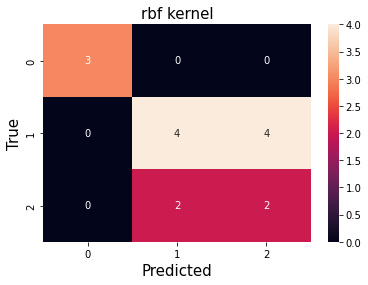

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.67      0.50      0.57         8
   virginica       0.33      0.50      0.40         4

    accuracy                           0.60        15
   macro avg       0.67      0.67      0.66        15
weighted avg       0.64      0.60      0.61        15



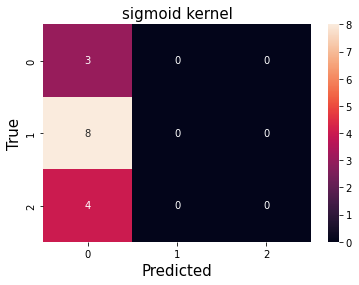

              precision    recall  f1-score   support

      setosa       0.20      1.00      0.33         3
  versicolor       0.00      0.00      0.00         8
   virginica       0.00      0.00      0.00         4

    accuracy                           0.20        15
   macro avg       0.07      0.33      0.11        15
weighted avg       0.04      0.20      0.07        15



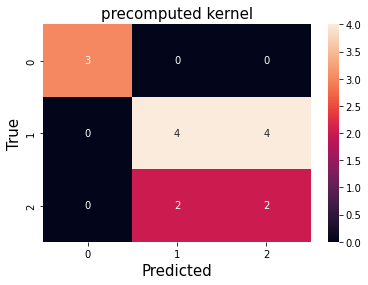

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.67      0.50      0.57         8
   virginica       0.33      0.50      0.40         4

    accuracy                           0.60        15
   macro avg       0.67      0.67      0.66        15
weighted avg       0.64      0.60      0.61        15



In [9]:
# Eliminating the next feature having highest correlation with other features i.e., petal width
x = x.drop(columns=['petal width (cm)'])

# Split training and testing data
x_train, x_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.1, random_state=0)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
# Perform classification
svm_func(x_train, x_test, y_train, y_test)


# Question 2

In [10]:
dataset = pd.read_csv('bill_authentication.csv')
print(dataset.shape)
dataset.head()


(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


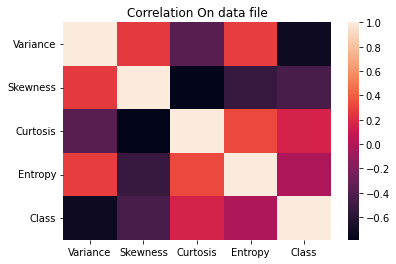

In [11]:
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation On data file')
plt.show()


In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X.shape, y.shape)


(1372, 4) (1372,)


In [13]:
def predict(kernel, X_train, y_train, X_test, y_test):
    # Linear Kernel
    classifier = svm.SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title(kernel + " kernel")
    plt.show()
    print(classification_report(y_test, y_pred))


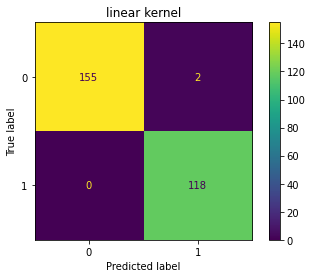

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



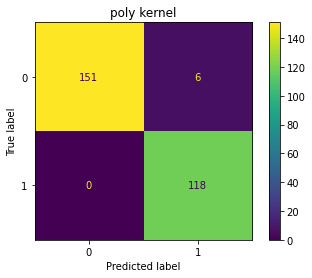

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       157
           1       0.95      1.00      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



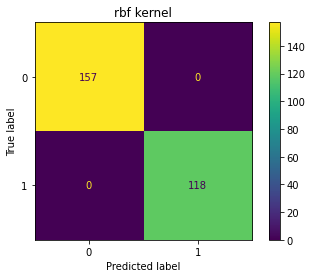

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



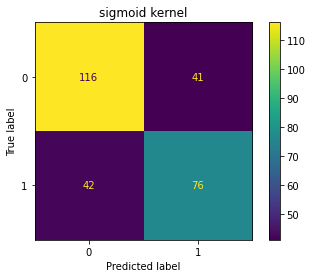

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       157
           1       0.65      0.64      0.65       118

    accuracy                           0.70       275
   macro avg       0.69      0.69      0.69       275
weighted avg       0.70      0.70      0.70       275



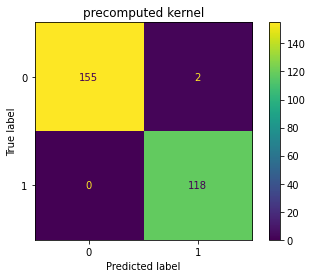

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [14]:
predict('linear', X_train, y_train, X_test, y_test)
predict('poly', X_train, y_train, X_test, y_test)
predict('rbf', X_train, y_train, X_test, y_test)
predict('sigmoid', X_train, y_train, X_test, y_test)

new_X_train = np.dot(X_train, X_train.T)
new_X_test = np.dot(X_test, X_train.T)
predict('precomputed', new_X_train, y_train, new_X_test, y_test)


In [15]:
# Normalize the data now and perform above functions
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)


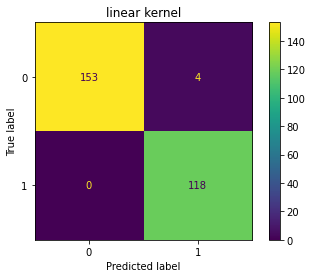

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



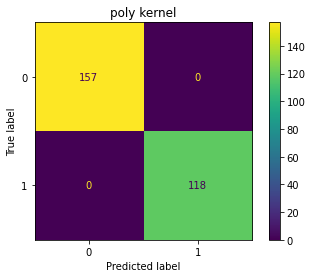

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



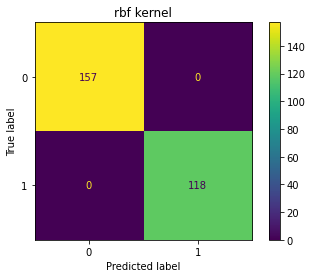

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



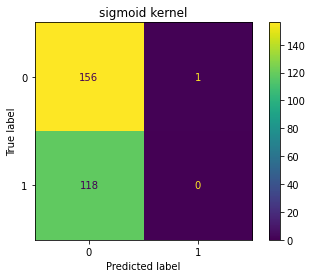

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       157
           1       0.00      0.00      0.00       118

    accuracy                           0.57       275
   macro avg       0.28      0.50      0.36       275
weighted avg       0.33      0.57      0.41       275



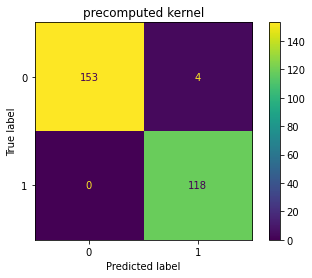

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [16]:
predict('linear', X_train_minmax, y_train, X_test_minmax, y_test)
predict('poly', X_train_minmax, y_train, X_test_minmax, y_test)
predict('rbf', X_train_minmax, y_train, X_test_minmax, y_test)
predict('sigmoid', X_train_minmax, y_train, X_test_minmax, y_test)

new_X_train = np.dot(X_train_minmax, X_train_minmax.T)
new_X_test = np.dot(X_test_minmax, X_train_minmax.T)

predict('precomputed', new_X_train, y_train, new_X_test, y_test)


# Question 3

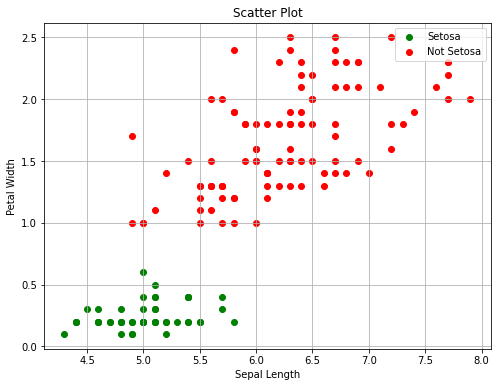

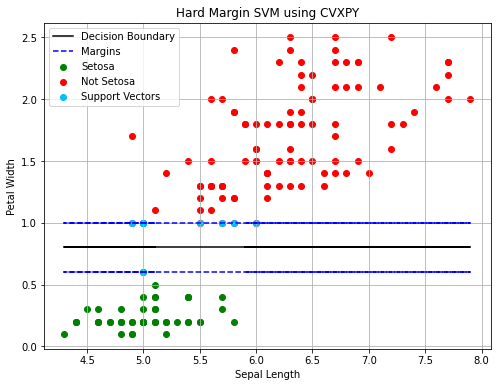

In [17]:
# Applying SVM to the Dataset
# Loading the dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Extracting the required features
X = X[:, (True, False, False, True)]

# Divinding the classes as sentosa and not-sentosa
for i in range(Y.size):
    if Y[i] == 0:
        Y[i] = 1
    else:
        Y[i] = -1

X_setosa = X[Y == 1]
X_not_setosa = X[Y == -1]

# Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='g', label='Setosa')
plt.scatter(X_not_setosa[:, 0], X_not_setosa[:, 1],
            color='r', label='Not Setosa')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot")
plt.legend()
plt.show()

# Solving the optimization problem using the library cvxpy
n = np.size(X, 0)
w = cp.Variable(2)
b = cp.Variable()
constraints = []

for i in range(n):
    constraints += [Y[i]*(X[i]*w+b) >= 1]

objective_fn = cp.Minimize(0.5*cp.pnorm(w, p=2)**2)
problem = cp.Problem(objective_fn, constraints)
problem.solve()

# Using the w and b values to get the hyperplane
X1 = X[:, 0]
X2 = -1*(b.value + w.value[0]*X1)/w.value[1]
SV1 = -1*(b.value + 1 + w.value[0]*X1)/w.value[1]
SV2 = -1*(b.value - 1 + w.value[0]*X1)/w.value[1]

# Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='g', label='Setosa')
plt.scatter(X_not_setosa[:, 0], X_not_setosa[:, 1],
            color='r', label='Not Setosa')
plt.plot(X1, X2, color='black', linestyle='solid', label='Decision Boundary')
plt.plot(X1, SV1, color='blue', linestyle='dashed', label='Margins')
plt.plot(X1, SV2, color='blue', linestyle='dashed')

# Extracting the support vectors
sv_x = []
sv_y = []
for i in range(np.size(Y)):
    if abs((w.value[0]*X[i, 0]) + (w.value[1]*X[i, 1]) + b.value - 1) <= 1e-5:
        sv_x.append(X[i, :])
        sv_y.append(Y[i])
    if abs((w.value[0]*X[i, 0]) + (w.value[1]*X[i, 1]) + b.value + 1) <= 1e-5:
        sv_x.append(X[i, :])
        sv_y.append(Y[i])
sv_x = np.array(sv_x)
sv_y = np.array(sv_y)

# Plotting the support vectors
plt.scatter(sv_x[:, 0], sv_x[:, 1], color='deepskyblue',
            marker='o', label='Support Vectors')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Hard Margin SVM using CVXPY")
plt.legend()
plt.show()


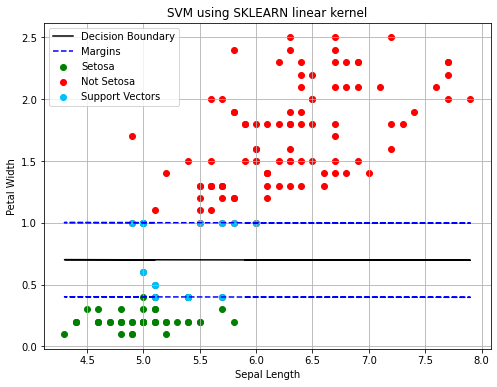

In [18]:
# Using SVM function from Sklearn
from sklearn.svm import SVC

# fitting the data
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X, Y)

# Using the values from sklearn function, the eqns of hyperplane is calculated
X1 = X[:, 0]
X2 = -1*(clf.intercept_[0] + clf.coef_[0, 0]*X1)/clf.coef_[0, 1]
SV1 = -1*(clf.intercept_[0] + 1 + clf.coef_[0, 0]*X1)/clf.coef_[0, 1]
SV2 = -1*(clf.intercept_[0] - 1 + clf.coef_[0, 0]*X1)/clf.coef_[0, 1]

# plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='g', label='Setosa')
plt.scatter(X_not_setosa[:, 0], X_not_setosa[:, 1],
            color='r', label='Not Setosa')
plt.plot(X1, X2, color='black', linestyle='solid', label='Decision Boundary')
plt.plot(X1, SV1, color='blue', linestyle='dashed', label='Margins')
plt.plot(X1, SV2, color='blue', linestyle='dashed')

# plotting the support vectors
xx = []
yy = []
for i in clf.support_:
    xx.append(X[i, 0])
    yy.append(X[i, 1])
plt.scatter(xx, yy, marker='o', color='deepskyblue', label='Support Vectors')
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("SVM using SKLEARN linear kernel")
plt.legend()
plt.show()


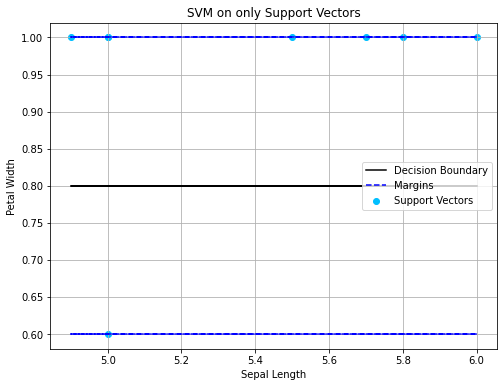

In [19]:
# Applying SVM only on the Support Vectors
X = sv_x
Y = sv_y
# Solving the optimization problem using the library cvxpy
n = np.size(X, 0)
w = cp.Variable(2)
b = cp.Variable()
constraints = []

for i in range(n):
    constraints += [Y[i]*(X[i]*w+b) >= 1]

objective_fn = cp.Minimize(0.5*cp.pnorm(w, p=2)**2)
problem = cp.Problem(objective_fn, constraints)
problem.solve()

# Using the w and b values to get the hyperplane
X1 = X[:, 0]
X2 = -1*(b.value + w.value[0]*X1)/w.value[1]
SV1 = -1*(b.value + 1 + w.value[0]*X1)/w.value[1]
SV2 = -1*(b.value - 1 + w.value[0]*X1)/w.value[1]

# Plotting of the graph
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='deepskyblue',
            marker='o', label='Support Vectors')
plt.plot(X1, X2, color='black', linestyle='solid', label='Decision Boundary')
plt.plot(X1, SV1, color='blue', linestyle='dashed', label='Margins')
plt.plot(X1, SV2, color='blue', linestyle='dashed')
plt.legend(loc=5)
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("SVM on only Support Vectors")
plt.show()
